In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
df = pd.read_csv(url,sep = ";")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [ ]:
# 1. Check for null values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# 2. Replace null values if any
df.fillna(df.mean(), inplace=True)

In [ ]:
# 3. Remove records with many null values if any
df = df.dropna(thresh=len(df.columns)-2)

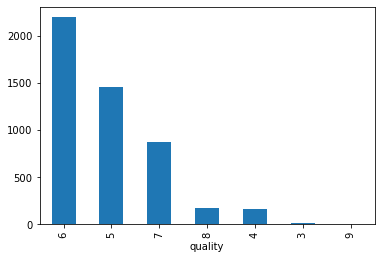

In [ ]:
# 4. Draw the stat of number of each quality wine
df['quality'].value_counts().plot(kind='bar')
plt.show()


In [ ]:
# 5. Map the Quality to numbers
quality_mapping = {quality: i for i, quality in enumerate(df['quality'].unique())}
df['quality'] = df['quality'].map(quality_mapping)

In [ ]:
# 6. Construct the DT using ID3 and CART
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ID3
clf_id3 = tree.DecisionTreeClassifier(criterion='entropy')
clf_id3 = clf_id3.fit(X_train, y_train)


In [ ]:
# CART
clf_cart = tree.DecisionTreeClassifier(criterion='gini')
clf_cart = clf_cart.fit(X_train, y_train)

In [ ]:
# 7. Measure the accuracy both the DT using K-FOLD Cross validation
scores_id3 = cross_val_score(clf_id3, X, y, cv=5)
scores_cart = cross_val_score(clf_cart, X, y, cv=5)

In [ ]:
# 8. Print classification report, its confusion matrix, the accuracy, precision and recall score
y_pred_id3 = clf_id3.predict(X_test)
y_pred_cart = clf_cart.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

print(classification_report(y_test, y_pred_id3))
print(confusion_matrix(y_test, y_pred_id3))
print(accuracy_score(y_test, y_pred_id3))
print(precision_score(y_test, y_pred_id3, average='weighted'))
print(recall_score(y_test, y_pred_id3, average='weighted'))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       432
           1       0.65      0.59      0.62       291
           2       0.57      0.59      0.58       192
           3       0.35      0.51      0.41        35
           4       0.29      0.36      0.32        25
           5       0.50      0.20      0.29         5
           6       0.00      0.00      0.00         0

    accuracy                           0.60       980
   macro avg       0.43      0.41      0.41       980
weighted avg       0.61      0.60      0.60       980

[[276  73  59  15   9   0   0]
 [ 90 172  13   5  11   0   0]
 [ 49  11 113  14   2   1   2]
 [  9   0   8  18   0   0   0]
 [  4   8   4   0   9   0   0]
 [  2   1   1   0   0   1   0]
 [  0   0   0   0   0   0   0]]
0.6010204081632653
0.6098044891179766
0.6010204081632653


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefin

In [ ]:

print(classification_report(y_test, y_pred_cart))
print(confusion_matrix(y_test, y_pred_cart))
print(accuracy_score(y_test, y_pred_cart))
print(precision_score(y_test, y_pred_cart, average='weighted'))
print(recall_score(y_test, y_pred_cart, average='weighted'))

              precision    recall  f1-score   support

           0       0.64      0.63      0.64       432
           1       0.64      0.64      0.64       291
           2       0.61      0.59      0.60       192
           3       0.35      0.46      0.40        35
           4       0.22      0.28      0.25        25
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         0

    accuracy                           0.61       980
   macro avg       0.35      0.37      0.36       980
weighted avg       0.61      0.61      0.61       980

[[273  87  53   8  10   0   1]
 [ 82 185   9   3  12   0   0]
 [ 51   6 114  18   2   0   1]
 [  9   0  10  16   0   0   0]
 [  9   7   0   1   7   1   0]
 [  2   2   0   0   1   0   0]
 [  0   0   0   0   0   0   0]]
0.6071428571428571
0.6119832143197916
0.6071428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefin

In [ ]:

# 9. Use cross validation to tune the hyperparameters of the tree
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=X, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.515312793145859 {'max_depth': 3}


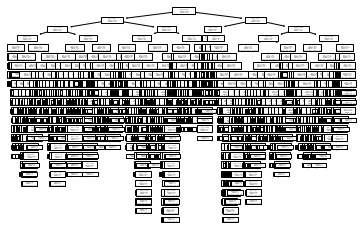

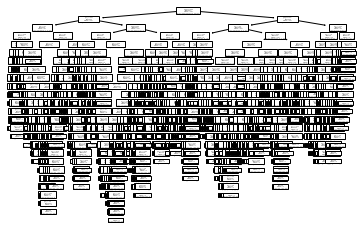

In [ ]:

# 10. plot_decision_trees obtained
tree.plot_tree(clf_id3)
plt.show()
tree.plot_tree(clf_cart)
plt.show()


In [ ]:
# 11. Plot the confusion matrix for the classified model
confusion_matrix(y_test, y_pred_id3)
confusion_matrix(y_test, y_pred_cart)

array([[273,  87,  53,   8,  10,   0,   1],
       [ 82, 185,   9,   3,  12,   0,   0],
       [ 51,   6, 114,  18,   2,   0,   1],
       [  9,   0,  10,  16,   0,   0,   0],
       [  9,   7,   0,   1,   7,   1,   0],
       [  2,   2,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]])

In [ ]:
'''Why model is performing well or not after getting accuracy?
Accuracy, precision, and recall are important metrics in machine learning for evaluating
classification models. Accuracy measures the ratio of correct predictions to total
predictions, indicating how often the model predicts correctly. Precision, on the other
hand, represents the ratio of correctly predicted positive observations to the total
predicted positives, measuring the model's ability to identify positive instances
accurately. Recall, also known as sensitivity, calculates the ratio of correctly
predicted positive observations to all observations in the actual class, assessing
the model's ability to identify all positive instances. These metrics provide valuable
insights into the model's performance and its ability to make accurate predictions
and identify positive instances.'''

"Why model is performing well or not after getting accuracy?\nAccuracy, precision, and recall are important metrics in machine learning for evaluating\nclassification models. Accuracy measures the ratio of correct predictions to total \npredictions, indicating how often the model predicts correctly. Precision, on the other\nhand, represents the ratio of correctly predicted positive observations to the total \npredicted positives, measuring the model's ability to identify positive instances\naccurately. Recall, also known as sensitivity, calculates the ratio of correctly\npredicted positive observations to all observations in the actual class, assessing \nthe model's ability to identify all positive instances. These metrics provide valuable \ninsights into the model's performance and its ability to make accurate predictions \nand identify positive instances."

In [ ]:
'''Conclusion:The model maps wine quality to numerical values, visualises the distribution
of wine quality, and handles missing values. After that, it builds decision trees, applies
K-Fold Cross Validation to assess how well they function, and outputs a number of measures,
including the confusion matrix, accuracy, precision, and recall. Additionally, the model
uses GridSearchCV to adjust the tree's hyperparameters. The model's predictions
are accurate about 60% of the time, according to the moderate accuracy scores attained
. This shows that even if the model has picked up some knowledge from the dataset,
it can still be strengthened. Additional feature engineering, hyperparameter tuning,
or experimenting with more sophisticated models are some potential improvement strategies.
'''


